In [36]:
import tensorflow as tf
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [37]:
dataset = pd.read_csv('weatherHistory.csv')
dataset.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [38]:
date_time = dataset['Formatted Date'] = pd.to_datetime(dataset['Formatted Date'])
dataset.set_index('Formatted Date', inplace=True)
dataset.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,,
2006-04-01 00:00:00+02:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
2006-04-01 01:00:00+02:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2006-04-01 02:00:00+02:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
2006-04-01 03:00:00+02:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
2006-04-01 04:00:00+02:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [39]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Temperature (C),96453.0,11.932678,9.551546,-21.822222,4.688889,12.0000,18.838889,39.905556
Apparent Temperature (C),96453.0,10.855029,10.696847,-27.716667,2.311111,12.0000,18.838889,39.344444
Humidity,96453.0,0.734899,0.195473,0.000000,0.600000,0.7800,0.890000,1.000000
Wind Speed (km/h),96453.0,10.810640,6.913571,0.000000,5.828200,9.9659,14.135800,63.852600
Wind Bearing (degrees),96453.0,187.509232,107.383428,0.000000,116.000000,180.0000,290.000000,359.000000
Visibility (km),96453.0,10.347325,4.192123,0.000000,8.339800,10.0464,14.812000,16.100000
Loud Cover,96453.0,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
Pressure (millibars),96453.0,1003.235956,116.969906,0.000000,1011.900000,1016.4500,1021.090000,1046.380000


In [40]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96453 entries, 2006-04-01 00:00:00+02:00 to 2016-09-09 23:00:00+02:00
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Summary                   96453 non-null  object 
 1   Precip Type               95936 non-null  object 
 2   Temperature (C)           96453 non-null  float64
 3   Apparent Temperature (C)  96453 non-null  float64
 4   Humidity                  96453 non-null  float64
 5   Wind Speed (km/h)         96453 non-null  float64
 6   Wind Bearing (degrees)    96453 non-null  float64
 7   Visibility (km)           96453 non-null  float64
 8   Loud Cover                96453 non-null  float64
 9   Pressure (millibars)      96453 non-null  float64
 10  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(3)
memory usage: 8.8+ MB


In [41]:
wv = dataset.pop('Wind Speed (km/h)')
wd = dataset.pop('Wind Bearing (degrees)') * np.pi / 180

dataset['Wx'] = wv * np.cos(wd)
dataset['Wy'] = wv * np.sin(wd)

In [42]:
dataset.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Wx,Wy
Formatted Date,,,,,,,,,,,
2006-04-01 00:00:00+02:00,Partly Cloudy,rain,9.472222,7.388889,0.89,15.8263,0.0,1015.13,Partly cloudy throughout the day.,-4.596925,-13.350439
2006-04-01 01:00:00+02:00,Partly Cloudy,rain,9.355556,7.227778,0.86,15.8263,0.0,1015.63,Partly cloudy throughout the day.,-2.721814,-14.002519
2006-04-01 02:00:00+02:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,14.9569,0.0,1015.94,Partly cloudy throughout the day.,-3.588772,-1.597824
2006-04-01 03:00:00+02:00,Partly Cloudy,rain,8.288889,5.944444,0.83,15.8263,0.0,1016.41,Partly cloudy throughout the day.,-0.246142,-14.101452
2006-04-01 04:00:00+02:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,15.8263,0.0,1016.51,Partly cloudy throughout the day.,-2.107409,-10.841680


In [43]:
dataset.index.min()

datetime.datetime(2006, 1, 1, 0, 0, tzinfo=tzoffset(None, 3600))

In [44]:
dataset.index.max()

datetime.datetime(2016, 12, 31, 23, 0, tzinfo=tzoffset(None, 3600))

In [45]:
dataset.shape

(96453, 11)

In [46]:
from sklearn.preprocessing import LabelEncoder

for column in dataset.select_dtypes('object').columns:
  encoder = LabelEncoder()
  dataset[column] = encoder.fit_transform(dataset[column])

In [47]:
dataset.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Wx,Wy
Formatted Date,,,,,,,,,,,
2006-04-01 00:00:00+02:00,19,0,9.472222,7.388889,0.89,15.8263,0.0,1015.13,197,-4.596925,-13.350439
2006-04-01 01:00:00+02:00,19,0,9.355556,7.227778,0.86,15.8263,0.0,1015.63,197,-2.721814,-14.002519
2006-04-01 02:00:00+02:00,17,0,9.377778,9.377778,0.89,14.9569,0.0,1015.94,197,-3.588772,-1.597824
2006-04-01 03:00:00+02:00,19,0,8.288889,5.944444,0.83,15.8263,0.0,1016.41,197,-0.246142,-14.101452
2006-04-01 04:00:00+02:00,17,0,8.755556,6.977778,0.83,15.8263,0.0,1016.51,197,-2.107409,-10.841680


In [50]:
dataset.drop(['Loud Cover'], axis=1, inplace=True)

In [51]:
dataset.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Visibility (km),Pressure (millibars),Daily Summary,Wx,Wy
Formatted Date,,,,,,,,,,
2006-04-01 00:00:00+02:00,19,0,9.472222,7.388889,0.89,15.8263,1015.13,197,-4.596925,-13.350439
2006-04-01 01:00:00+02:00,19,0,9.355556,7.227778,0.86,15.8263,1015.63,197,-2.721814,-14.002519
2006-04-01 02:00:00+02:00,17,0,9.377778,9.377778,0.89,14.9569,1015.94,197,-3.588772,-1.597824
2006-04-01 03:00:00+02:00,19,0,8.288889,5.944444,0.83,15.8263,1016.41,197,-0.246142,-14.101452
2006-04-01 04:00:00+02:00,17,0,8.755556,6.977778,0.83,15.8263,1016.51,197,-2.107409,-10.841680


In [52]:
# Lets check the NULL Values first

null = pd.DataFrame(dataset.isnull().sum()).rename(columns={0:"Total"})
null['percentage'] = null['Total'] / len(dataset)
null.sort_values('percentage',ascending=False).head()

,Total,percentage
Summary,0,0.0
Precip Type,0,0.0
Temperature (C),0,0.0
Apparent Temperature (C),0,0.0
Humidity,0,0.0


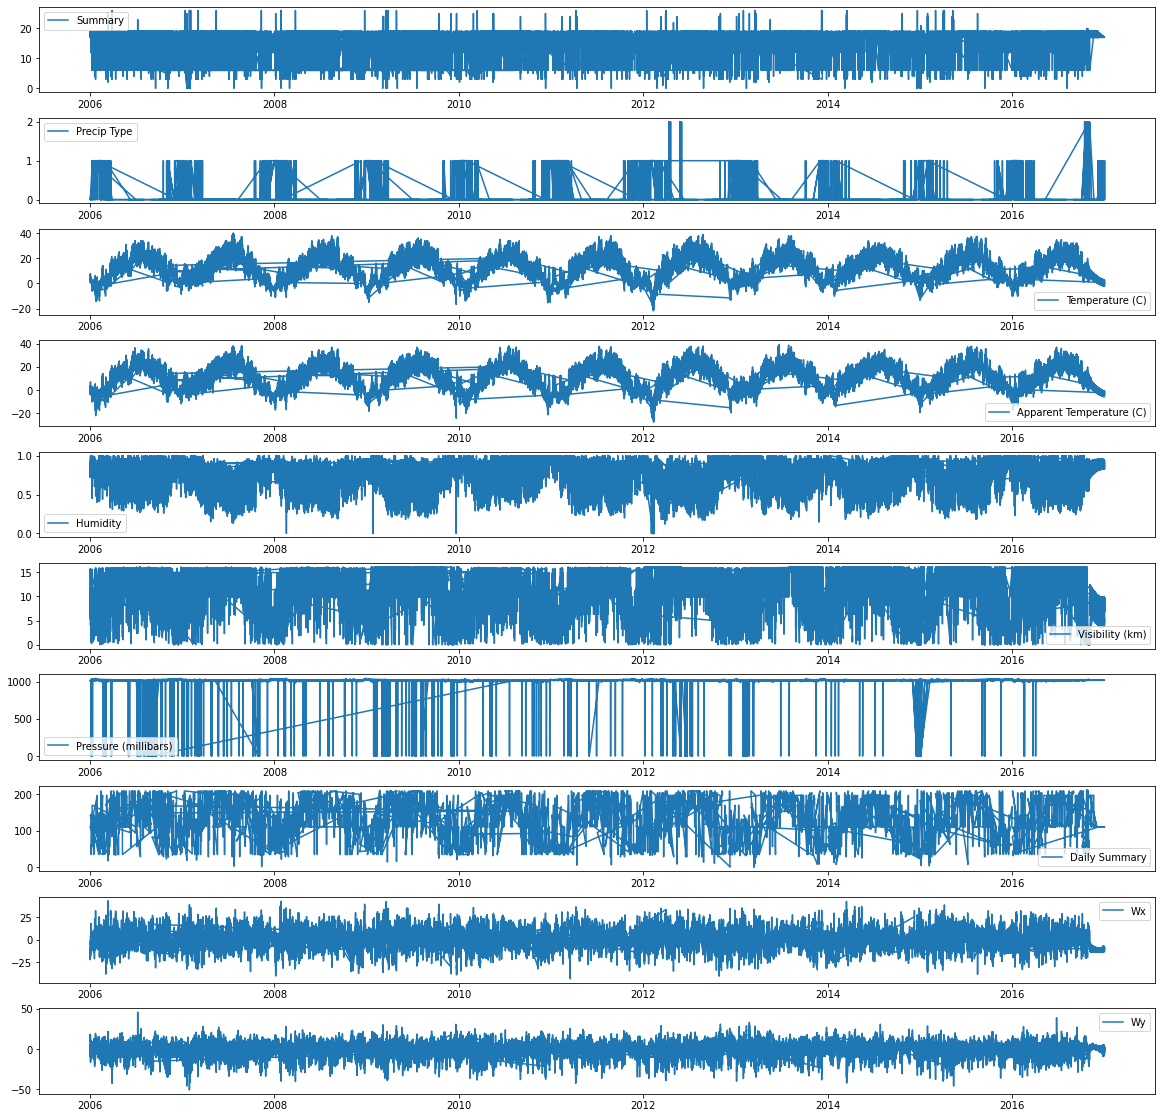

In [53]:
plt.figure(figsize=(20, 20))
for idx, col in enumerate(dataset.columns):
    plt.subplot(len(dataset.columns), 1, idx+1)
    plt.plot(dataset[col], label=col)
    plt.legend()    
plt.subplots_adjust(hspace=0.3, wspace=0.5)

In [54]:
# Lets split the dataset 

train = dataset[0 : int(0.7 * len(dataset))]
val = dataset[int(0.7 * len(dataset)):int(0.9 * len(dataset))]
test = dataset[int(0.9 * len(dataset)):]

In [55]:
train_label = train['Temperature (C)']
train = train.drop(['Temperature (C)'], axis=1)

val_label = val['Temperature (C)']
val = val.drop(['Temperature (C)'], axis=1)

test_label = test['Temperature (C)']
test = test.drop(['Temperature (C)'], axis=1)

In [56]:
mean = train.mean()
std = train.std() + 1e-12

train = (train - mean) / std
val = (val - mean) / std
test = (test - mean) / std

In [57]:
train.shape

(67517, 9)

In [58]:
def train_loader(data, labels, batchsize=32, buffersize=100):
  dataset = tf.data.Dataset.from_tensor_slices((data, labels))
  dataset = dataset.cache().shuffle(buffersize).batch(batchsize)
  dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)
  return dataset

In [59]:
def val_loader(data, labels, batchsize=32):
  dataset = tf.data.Dataset.from_tensor_slices((data, labels))
  dataset = dataset.cache().batch(batchsize)
  dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)
  return dataset

In [60]:
def test_loader(data, batchsize=32):
  dataset = tf.data.Dataset.from_tensor_slices(data)
  dataset = dataset.cache().batch(batchsize)
  dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)
  return dataset

In [61]:
train_load = train_loader(train.to_numpy(), train_label.to_numpy())
val_load = val_loader(val.to_numpy(), val_label.to_numpy())
test_load = test_loader(test.to_numpy())

In [64]:
for X, Y in train_load.take(1):
  print(X.shape)
  print(Y.shape)
  print(X)
  print(Y)

(32, 9)
(32,)
tf.Tensor(
[[ 2.53612242e-01 -3.89015752e-01  4.89592951e-01 -1.00394387e+00
   1.28439935e-03  4.32326187e-02 -3.36493904e-01 -1.92581239e+00
   1.45829145e+00]
 [ 4.74146189e-01 -3.89015752e-01 -4.38751994e-01  1.01143321e+00
  -1.58596993e+00  1.55811925e-02 -1.70494069e+00  2.18117704e+00
  -8.08544751e-01]
 [ 2.53612242e-01 -3.89015752e-01  8.49194964e-01 -1.65894142e+00
   1.28439935e-03  7.80937726e-02 -3.36493904e-01 -2.90728279e+00
   7.29707977e-01]
 [ 2.53612242e-01 -3.89015752e-01  4.43451549e-01 -5.00099598e-01
   3.78412712e-01  1.11597801e-01  1.17230640e+00 -7.83521723e-01
  -8.81064330e-01]
 [ 6.94680136e-01 -3.89015752e-01  2.88978160e-01  5.57973370e-01
   2.16786292e-01  2.38935844e-02 -1.70494069e+00 -9.18578362e-01
   5.30506500e-01]
 [ 4.74146189e-01 -3.89015752e-01  3.26593434e-01 -7.01637307e-01
   1.28186296e+00  4.13665715e-02 -3.36493904e-01 -1.70092847e+00
   5.50970552e-01]
 [ 4.74146189e-01 -3.89015752e-01  2.38824463e-01 -5.00099598e-01
   

In [65]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[9]),
    tf.keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(1)
])

In [66]:
model.compile(loss='mse', optimizer='adam')

In [67]:
earlystop = tf.keras.callbacks.EarlyStopping(patience=10)
checkpoint = tf.keras.callbacks.ModelCheckpoint('best_temp/', save_best_only=True)

In [68]:
history = model.fit(train_load, validation_data=val_load, epochs=100, callbacks=[earlystop, checkpoint])

Epoch 1/100
2110/2110 [==============================] - 6s 2ms/step - loss: 19.3103 - val_loss: 0.8677
Epoch 2/100
2110/2110 [==============================] - 3s 1ms/step - loss: 0.9037 - val_loss: 0.6665
Epoch 3/100
2110/2110 [==============================] - 3s 1ms/step - loss: 0.6909 - val_loss: 0.5830
Epoch 4/100
2110/2110 [==============================] - 3s 1ms/step - loss: 0.5860 - val_loss: 0.5043
Epoch 5/100
2110/2110 [==============================] - 3s 1ms/step - loss: 0.5320 - val_loss: 0.4688
Epoch 6/100
2110/2110 [==============================] - 3s 2ms/step - loss: 0.4909 - val_loss: 0.4398
Epoch 7/100
2110/2110 [==============================] - 3s 1ms/step - loss: 0.4651 - val_loss: 0.4281
Epoch 8/100
2110/2110 [==============================] - 3s 2ms/step - loss: 0.4405 - val_loss: 0.4087
Epoch 9/100
2110/2110 [==============================] - 3s 1ms/step - loss: 0.4178 - val_loss: 0.3628
Epoch 10/100
2110/2110 [==============================] - 3s 1ms/step - 

In [70]:
# Lets try sequential loader

def create_sequential_loader(series, window_size=24, batchsize=32, buffersize=100):
    AUTOTUNE = tf.data.experimental.AUTOTUNE
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size, drop_remainder=True, shift=1)
    dataset = dataset.flat_map(lambda window: window.batch(window_size))
    dataset = dataset.map(lambda window: (window[:,:-1], window[-1,-1]), num_parallel_calls=AUTOTUNE)
    dataset = dataset.cache().shuffle(buffersize).batch(batchsize)
    return dataset.prefetch(tf.data.experimental.AUTOTUNE)

In [71]:
train = tf.concat([train.to_numpy(), train_label.to_numpy().reshape(-1,1)], axis=1)
val = tf.concat([val.to_numpy(), val_label.to_numpy().reshape(-1,1)], axis=1)

In [73]:
train = create_sequential_loader(train)
val = create_sequential_loader(val)

In [74]:
for X, Y in train.take(1):
    print(X.shape)
    print(Y.shape)

(32, 24, 9)
(32,)


In [75]:
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(50, return_sequences=True, input_shape=[None, 9]),
    tf.keras.layers.LSTM(50),
    tf.keras.layers.Dense(1),
])

In [76]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, None, 50)          12000     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 32,251
Trainable params: 32,251
Non-trainable params: 0
_________________________________________________________________


In [77]:
model.compile(loss='mse', optimizer='adam')

In [78]:
earlystop = tf.keras.callbacks.EarlyStopping(patience=10)
checkpoint = tf.keras.callbacks.ModelCheckpoint('best_seq_temp/', save_best_only=True)

In [79]:
history = model.fit(train, epochs=100, validation_data=val, callbacks=[earlystop, checkpoint])

Epoch 1/100
   2108/Unknown - 48s 21ms/step - loss: 18.1613

INFO:tensorflow:Assets written to: best_seq_temp/assets


INFO:tensorflow:Assets written to: best_seq_temp/assets


2110/2110 [==============================] - 60s 27ms/step - loss: 18.1513 - val_loss: 0.9908
Epoch 2/100
2107/2110 [============================>.] - ETA: 0s - loss: 0.8378

INFO:tensorflow:Assets written to: best_seq_temp/assets


INFO:tensorflow:Assets written to: best_seq_temp/assets


2110/2110 [==============================] - 48s 23ms/step - loss: 0.8371 - val_loss: 0.5081
Epoch 3/100
2108/2110 [============================>.] - ETA: 0s - loss: 0.4206

INFO:tensorflow:Assets written to: best_seq_temp/assets


INFO:tensorflow:Assets written to: best_seq_temp/assets


2110/2110 [==============================] - 49s 23ms/step - loss: 0.4204 - val_loss: 0.2752
Epoch 4/100
2108/2110 [============================>.] - ETA: 0s - loss: 0.2522

INFO:tensorflow:Assets written to: best_seq_temp/assets


INFO:tensorflow:Assets written to: best_seq_temp/assets


2110/2110 [==============================] - 48s 23ms/step - loss: 0.2520 - val_loss: 0.2014
Epoch 5/100
2110/2110 [==============================] - ETA: 0s - loss: 0.1645

INFO:tensorflow:Assets written to: best_seq_temp/assets


INFO:tensorflow:Assets written to: best_seq_temp/assets


2110/2110 [==============================] - 48s 23ms/step - loss: 0.1645 - val_loss: 0.1318
Epoch 6/100
2108/2110 [============================>.] - ETA: 0s - loss: 0.1246

INFO:tensorflow:Assets written to: best_seq_temp/assets


INFO:tensorflow:Assets written to: best_seq_temp/assets


2110/2110 [==============================] - 48s 23ms/step - loss: 0.1246 - val_loss: 0.0805
Epoch 7/100
2110/2110 [==============================] - 41s 20ms/step - loss: 0.1055 - val_loss: 0.0939
Epoch 8/100
2109/2110 [============================>.] - ETA: 0s - loss: 0.0868

INFO:tensorflow:Assets written to: best_seq_temp/assets


INFO:tensorflow:Assets written to: best_seq_temp/assets


2110/2110 [==============================] - 48s 23ms/step - loss: 0.0867 - val_loss: 0.0610
Epoch 9/100
2110/2110 [==============================] - 41s 20ms/step - loss: 0.1569 - val_loss: 0.0741
Epoch 10/100
2108/2110 [============================>.] - ETA: 0s - loss: 0.0778

INFO:tensorflow:Assets written to: best_seq_temp/assets


INFO:tensorflow:Assets written to: best_seq_temp/assets


2110/2110 [==============================] - 48s 23ms/step - loss: 0.0777 - val_loss: 0.0521
Epoch 11/100
2110/2110 [==============================] - 41s 20ms/step - loss: 0.0671 - val_loss: 0.0540
Epoch 12/100
2108/2110 [============================>.] - ETA: 0s - loss: 0.0656

INFO:tensorflow:Assets written to: best_seq_temp/assets


INFO:tensorflow:Assets written to: best_seq_temp/assets


2110/2110 [==============================] - 48s 23ms/step - loss: 0.0656 - val_loss: 0.0428
Epoch 13/100
2110/2110 [==============================] - 41s 19ms/step - loss: 0.0603 - val_loss: 0.0465
Epoch 14/100
2109/2110 [============================>.] - ETA: 0s - loss: 0.0556

INFO:tensorflow:Assets written to: best_seq_temp/assets


INFO:tensorflow:Assets written to: best_seq_temp/assets


2110/2110 [==============================] - 47s 23ms/step - loss: 0.0556 - val_loss: 0.0390
Epoch 15/100
2110/2110 [==============================] - 41s 20ms/step - loss: 0.0557 - val_loss: 0.0508
Epoch 16/100
2107/2110 [============================>.] - ETA: 0s - loss: 0.0509

INFO:tensorflow:Assets written to: best_seq_temp/assets


INFO:tensorflow:Assets written to: best_seq_temp/assets


2110/2110 [==============================] - 47s 22ms/step - loss: 0.0509 - val_loss: 0.0351
Epoch 17/100
2110/2110 [==============================] - ETA: 0s - loss: 0.0490

INFO:tensorflow:Assets written to: best_seq_temp/assets


INFO:tensorflow:Assets written to: best_seq_temp/assets


2110/2110 [==============================] - 47s 22ms/step - loss: 0.0490 - val_loss: 0.0331
Epoch 18/100
2108/2110 [============================>.] - ETA: 0s - loss: 0.0480

INFO:tensorflow:Assets written to: best_seq_temp/assets


INFO:tensorflow:Assets written to: best_seq_temp/assets


2110/2110 [==============================] - 47s 22ms/step - loss: 0.0480 - val_loss: 0.0321
Epoch 19/100
2107/2110 [============================>.] - ETA: 0s - loss: 0.0445

INFO:tensorflow:Assets written to: best_seq_temp/assets


INFO:tensorflow:Assets written to: best_seq_temp/assets


2110/2110 [==============================] - 48s 23ms/step - loss: 0.0444 - val_loss: 0.0318
Epoch 20/100
2110/2110 [==============================] - 41s 19ms/step - loss: 0.0469 - val_loss: 0.0342
Epoch 21/100
2110/2110 [==============================] - 41s 19ms/step - loss: 0.0409 - val_loss: 0.0379
Epoch 22/100
2110/2110 [==============================] - 41s 19ms/step - loss: 0.0416 - val_loss: 0.0346
Epoch 23/100
2110/2110 [==============================] - 41s 20ms/step - loss: 0.0428 - val_loss: 0.0375
Epoch 24/100
2110/2110 [==============================] - 42s 20ms/step - loss: 0.0363 - val_loss: 0.0537
Epoch 25/100
2110/2110 [==============================] - 41s 19ms/step - loss: 0.0359 - val_loss: 0.0484
Epoch 26/100
2108/2110 [============================>.] - ETA: 0s - loss: 0.0308

INFO:tensorflow:Assets written to: best_seq_temp/assets


INFO:tensorflow:Assets written to: best_seq_temp/assets


2110/2110 [==============================] - 48s 23ms/step - loss: 0.0308 - val_loss: 0.0240
Epoch 27/100
2110/2110 [==============================] - 41s 19ms/step - loss: 0.0291 - val_loss: 0.0308
Epoch 28/100
2108/2110 [============================>.] - ETA: 0s - loss: 0.0296

INFO:tensorflow:Assets written to: best_seq_temp/assets


INFO:tensorflow:Assets written to: best_seq_temp/assets


2110/2110 [==============================] - 48s 23ms/step - loss: 0.0296 - val_loss: 0.0216
Epoch 29/100
2110/2110 [==============================] - 41s 19ms/step - loss: 0.0255 - val_loss: 0.0364
Epoch 30/100
2110/2110 [==============================] - 41s 20ms/step - loss: 0.0241 - val_loss: 0.0376
Epoch 31/100
2110/2110 [==============================] - 41s 20ms/step - loss: 0.0229 - val_loss: 0.0224
Epoch 32/100
2108/2110 [============================>.] - ETA: 0s - loss: 0.0275

INFO:tensorflow:Assets written to: best_seq_temp/assets


INFO:tensorflow:Assets written to: best_seq_temp/assets


2110/2110 [==============================] - 48s 23ms/step - loss: 0.0275 - val_loss: 0.0190
Epoch 33/100
2110/2110 [==============================] - 41s 19ms/step - loss: 0.0200 - val_loss: 0.0265
Epoch 34/100
2110/2110 [==============================] - 41s 20ms/step - loss: 0.0206 - val_loss: 0.0239
Epoch 35/100
2110/2110 [==============================] - 41s 19ms/step - loss: 0.0197 - val_loss: 0.0191
Epoch 36/100
2108/2110 [============================>.] - ETA: 0s - loss: 0.0191

INFO:tensorflow:Assets written to: best_seq_temp/assets


INFO:tensorflow:Assets written to: best_seq_temp/assets


2110/2110 [==============================] - 48s 23ms/step - loss: 0.0191 - val_loss: 0.0149
Epoch 37/100
2110/2110 [==============================] - 41s 20ms/step - loss: 0.0194 - val_loss: 0.0161
Epoch 38/100
2108/2110 [============================>.] - ETA: 0s - loss: 0.0184

INFO:tensorflow:Assets written to: best_seq_temp/assets


INFO:tensorflow:Assets written to: best_seq_temp/assets


2110/2110 [==============================] - 48s 23ms/step - loss: 0.0184 - val_loss: 0.0144
Epoch 39/100
2110/2110 [==============================] - 41s 20ms/step - loss: 0.0177 - val_loss: 0.0187
Epoch 40/100
2110/2110 [==============================] - 41s 20ms/step - loss: 0.0171 - val_loss: 0.0229
Epoch 41/100
2108/2110 [============================>.] - ETA: 0s - loss: 0.0160

INFO:tensorflow:Assets written to: best_seq_temp/assets


INFO:tensorflow:Assets written to: best_seq_temp/assets


2110/2110 [==============================] - 48s 23ms/step - loss: 0.0160 - val_loss: 0.0134
Epoch 42/100
2110/2110 [==============================] - 42s 20ms/step - loss: 0.0178 - val_loss: 0.0239
Epoch 43/100
2110/2110 [==============================] - ETA: 0s - loss: 0.0147

INFO:tensorflow:Assets written to: best_seq_temp/assets


INFO:tensorflow:Assets written to: best_seq_temp/assets


2110/2110 [==============================] - 48s 23ms/step - loss: 0.0147 - val_loss: 0.0133
Epoch 44/100
2110/2110 [==============================] - 42s 20ms/step - loss: 0.0159 - val_loss: 0.0228
Epoch 45/100
2110/2110 [==============================] - 41s 20ms/step - loss: 0.0142 - val_loss: 0.0153
Epoch 46/100
2110/2110 [==============================] - 41s 20ms/step - loss: 0.0147 - val_loss: 0.0177
Epoch 47/100
2108/2110 [============================>.] - ETA: 0s - loss: 0.0133

INFO:tensorflow:Assets written to: best_seq_temp/assets


INFO:tensorflow:Assets written to: best_seq_temp/assets


2110/2110 [==============================] - 48s 23ms/step - loss: 0.0132 - val_loss: 0.0125
Epoch 48/100
2110/2110 [==============================] - 41s 19ms/step - loss: 0.0133 - val_loss: 0.0189
Epoch 49/100
2109/2110 [============================>.] - ETA: 0s - loss: 0.0126

INFO:tensorflow:Assets written to: best_seq_temp/assets


INFO:tensorflow:Assets written to: best_seq_temp/assets


2110/2110 [==============================] - 47s 22ms/step - loss: 0.0126 - val_loss: 0.0119
Epoch 50/100
2110/2110 [==============================] - 41s 19ms/step - loss: 0.0173 - val_loss: 0.0129
Epoch 51/100
2110/2110 [==============================] - 41s 19ms/step - loss: 0.0141 - val_loss: 0.0136
Epoch 52/100
2108/2110 [============================>.] - ETA: 0s - loss: 0.0116

INFO:tensorflow:Assets written to: best_seq_temp/assets


INFO:tensorflow:Assets written to: best_seq_temp/assets


2110/2110 [==============================] - 47s 22ms/step - loss: 0.0116 - val_loss: 0.0118
Epoch 53/100
2110/2110 [==============================] - 41s 19ms/step - loss: 0.0112 - val_loss: 0.0140
Epoch 54/100
2110/2110 [==============================] - 41s 19ms/step - loss: 0.0123 - val_loss: 0.0148
Epoch 55/100
2110/2110 [==============================] - 41s 19ms/step - loss: 0.0118 - val_loss: 0.0206
Epoch 56/100
2110/2110 [==============================] - 41s 19ms/step - loss: 0.0112 - val_loss: 0.0145
Epoch 57/100
2110/2110 [==============================] - 41s 20ms/step - loss: 0.0110 - val_loss: 0.0140
Epoch 58/100
2110/2110 [==============================] - 41s 20ms/step - loss: 0.0102 - val_loss: 0.0135
Epoch 59/100
2110/2110 [==============================] - 41s 20ms/step - loss: 0.0110 - val_loss: 0.0164
Epoch 60/100
2110/2110 [==============================] - 41s 20ms/step - loss: 0.0100 - val_loss: 0.0126
Epoch 61/100
2110/2110 [==============================] - 4

INFO:tensorflow:Assets written to: best_seq_temp/assets


INFO:tensorflow:Assets written to: best_seq_temp/assets


2110/2110 [==============================] - 48s 23ms/step - loss: 0.0111 - val_loss: 0.0116
Epoch 63/100
2108/2110 [============================>.] - ETA: 0s - loss: 0.0092

INFO:tensorflow:Assets written to: best_seq_temp/assets


INFO:tensorflow:Assets written to: best_seq_temp/assets


2110/2110 [==============================] - 48s 23ms/step - loss: 0.0092 - val_loss: 0.0107
Epoch 64/100
2110/2110 [==============================] - 41s 19ms/step - loss: 0.0095 - val_loss: 0.0127
Epoch 65/100
2110/2110 [==============================] - 41s 19ms/step - loss: 0.0094 - val_loss: 0.0113
Epoch 66/100
2109/2110 [============================>.] - ETA: 0s - loss: 0.0099

INFO:tensorflow:Assets written to: best_seq_temp/assets


INFO:tensorflow:Assets written to: best_seq_temp/assets


2110/2110 [==============================] - 47s 22ms/step - loss: 0.0099 - val_loss: 0.0106
Epoch 67/100
2110/2110 [==============================] - 41s 19ms/step - loss: 0.0088 - val_loss: 0.0145
Epoch 68/100
2110/2110 [==============================] - 42s 20ms/step - loss: 0.0089 - val_loss: 0.0197
Epoch 69/100
2110/2110 [==============================] - 42s 20ms/step - loss: 0.0086 - val_loss: 0.0140
Epoch 70/100
2107/2110 [============================>.] - ETA: 0s - loss: 0.0086

INFO:tensorflow:Assets written to: best_seq_temp/assets


INFO:tensorflow:Assets written to: best_seq_temp/assets


2110/2110 [==============================] - 49s 23ms/step - loss: 0.0086 - val_loss: 0.0101
Epoch 71/100
2110/2110 [==============================] - 42s 20ms/step - loss: 0.0091 - val_loss: 0.0127
Epoch 72/100
2110/2110 [==============================] - 42s 20ms/step - loss: 0.0079 - val_loss: 0.0108
Epoch 73/100
2110/2110 [==============================] - 42s 20ms/step - loss: 0.0089 - val_loss: 0.2287
Epoch 74/100
2110/2110 [==============================] - 41s 20ms/step - loss: 0.0127 - val_loss: 0.0114
Epoch 75/100
2110/2110 [==============================] - 41s 20ms/step - loss: 0.0074 - val_loss: 0.0101
Epoch 76/100
2110/2110 [==============================] - 41s 19ms/step - loss: 0.0075 - val_loss: 0.0103
Epoch 77/100
2110/2110 [==============================] - 46s 22ms/step - loss: 0.0075 - val_loss: 0.0128
Epoch 78/100
2110/2110 [==============================] - 45s 21ms/step - loss: 0.0077 - val_loss: 0.0111
Epoch 79/100
2108/2110 [============================>.] - E

INFO:tensorflow:Assets written to: best_seq_temp/assets


INFO:tensorflow:Assets written to: best_seq_temp/assets


2110/2110 [==============================] - 51s 24ms/step - loss: 0.0087 - val_loss: 0.0087
Epoch 80/100
2110/2110 [==============================] - 44s 21ms/step - loss: 0.0072 - val_loss: 0.0113
Epoch 81/100
2110/2110 [==============================] - 44s 21ms/step - loss: 0.0071 - val_loss: 0.0100
Epoch 82/100
2110/2110 [==============================] - 44s 21ms/step - loss: 0.0069 - val_loss: 0.0097
Epoch 83/100
2110/2110 [==============================] - ETA: 0s - loss: 0.0074

INFO:tensorflow:Assets written to: best_seq_temp/assets


INFO:tensorflow:Assets written to: best_seq_temp/assets


2110/2110 [==============================] - 51s 24ms/step - loss: 0.0074 - val_loss: 0.0082
Epoch 84/100
2110/2110 [==============================] - 45s 21ms/step - loss: 0.0066 - val_loss: 0.0110
Epoch 85/100
2110/2110 [==============================] - 44s 21ms/step - loss: 0.0079 - val_loss: 0.0098
Epoch 86/100
2110/2110 [==============================] - 44s 21ms/step - loss: 0.0058 - val_loss: 0.0087
Epoch 87/100
2110/2110 [==============================] - 45s 21ms/step - loss: 0.0069 - val_loss: 0.0118
Epoch 88/100
2110/2110 [==============================] - 45s 21ms/step - loss: 0.0073 - val_loss: 0.0093
Epoch 89/100
2110/2110 [==============================] - 45s 21ms/step - loss: 0.0059 - val_loss: 0.0104
Epoch 90/100
2110/2110 [==============================] - 45s 21ms/step - loss: 0.0070 - val_loss: 0.0228
Epoch 91/100
2110/2110 [==============================] - 45s 21ms/step - loss: 0.0069 - val_loss: 0.0089
Epoch 92/100
2110/2110 [==============================] - 4